In [1]:
"""
Entrenar un modelo usando Spark y Numba CUDA
"""
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("SOFM").getOrCreate()
sc = spark.sparkContext

In [2]:
import som
import numpy as np
import math
import time

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
    
faces = fetch_olivetti_faces()['data']
rows = 5
cols = 6
d=faces.shape[1]
iters = 50
smooth_iters = 25
sigma_0 = 3
tau = 50
rdd = sc.parallelize(faces)

In [10]:
inicio = time.time()
weights=som.spark_gpu_batch_som(rdd, d, iters, rows, cols, smooth_iters, sigma_0, 0.1, tau, seed=2)
fin = time.time()
print (fin - inicio)
cuda_weights = weights.reshape((rows, cols, d))

357.41189312934875


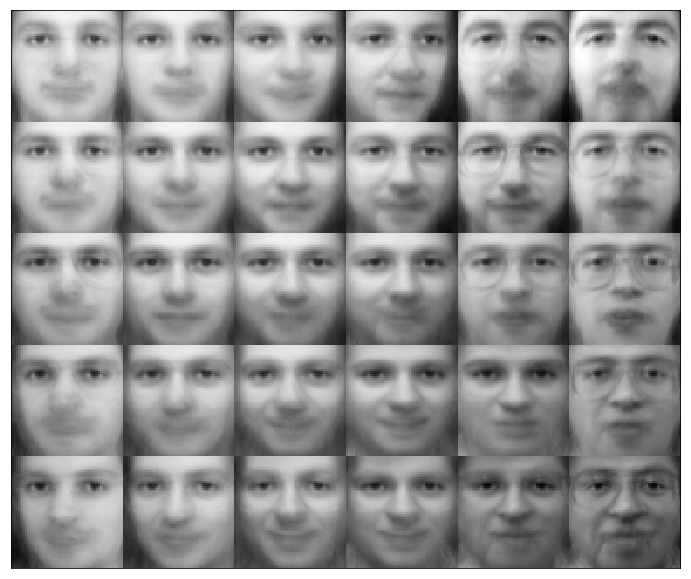

In [11]:
W = weights.reshape((rows, cols, d))
pattern_length = faces.shape[1]
pattern_width = pattern_height = int(np.sqrt(pattern_length))
matrix_w = np.empty((rows * pattern_height, cols * pattern_width))


for i in range(rows):
    for j in range(cols):
        matrix_w[i * pattern_height:i * pattern_height + pattern_height, 
j * pattern_height:j * pattern_height + pattern_width] = W[i, j].reshape((pattern_height, pattern_width)) * 255.0
fig, ax = plt.subplots(figsize=(12,12))

ax.matshow(matrix_w.tolist(), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [6]:
inicio = time.time()
weights = som.spark_cpu_batch_som(rdd, d, iters, rows, cols, smooth_iters, sigma_0, 0.1, tau, seed=2)
fin = time.time()
print(fin - inicio)
cpu_weights = weights

251.49400568008423


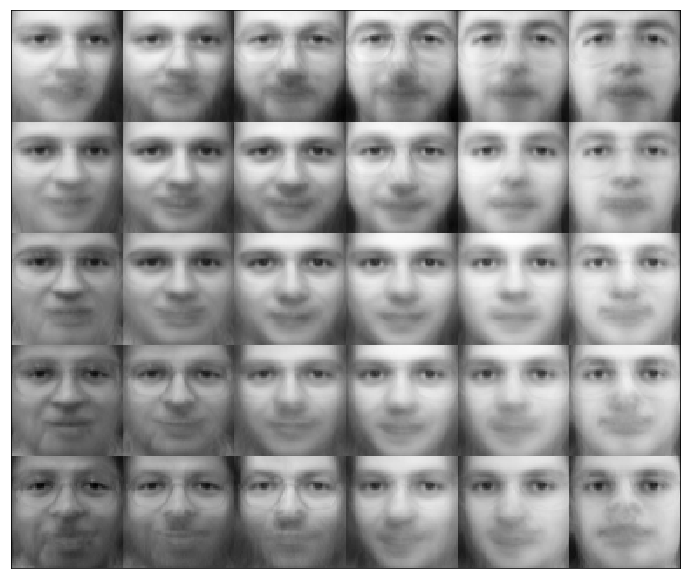

In [7]:
W = weights.reshape((rows, cols, d))
pattern_length = faces.shape[1]
pattern_width = pattern_height = int(np.sqrt(pattern_length))
matrix_w = np.empty((rows * pattern_height, cols * pattern_width))


for i in range(rows):
    for j in range(cols):
        matrix_w[i * pattern_height:i * pattern_height + pattern_height, 
j * pattern_height:j * pattern_height + pattern_width] = W[i, j].reshape((pattern_height, pattern_width)) * 255.0
fig, ax = plt.subplots(figsize=(12,12))

ax.matshow(matrix_w.tolist(), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [12]:
"""
Medidas de calidad del SOM.
"""
print('Error cuantifiación CPU:', som.quantification_error(faces, cpu_weights))
print('Error topográfico CPU:', som.topography_error(faces, cpu_weights))
print('Error cuantifiación GPU:', som.quantification_error(faces, cuda_weights))
print('Error topográfico GPU:', som.topography_error(faces, cuda_weights))

Error cuantifiación CPU: 6.55068485671
Error topográfico CPU: 0.025
Error cuantifiación GPU: 6.56651204467
Error topográfico GPU: 0.015
